In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score, f1_score,confusion_matrix,recall_score,precision_score, classification_report

In [2]:
# Last inn dataene
cancer = load_breast_cancer(as_frame=True)

In [3]:
X_data = cancer["data"]
X_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y_data = cancer["target"]
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

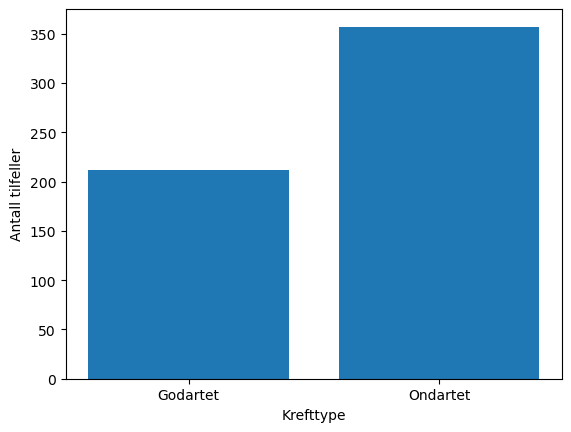

In [5]:
plt.bar(x=np.unique(y_data, return_counts=True)[0], height= np.unique(y_data, return_counts=True)[1])
plt.xticks([0,1],["Godartet", "Ondartet"])
plt.xlabel("Krefttype")
plt.ylabel("Antall tilfeller")
plt.show()

In [6]:
ondartet = (np.unique(y_data, return_counts=True)[1][0]/np.unique(y_data, return_counts=True)[1][1]).round(2)
print("{} % ondartet og {} % godartet".format(ondartet*100, 100*(1-ondartet).round(2)))

59.0 % ondartet og 41.0 % godartet


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=42)

In [8]:
logreg = LogisticRegression(solver='lbfgs',max_iter=5000)
logreg.fit(X_train, y_train)
y_test_hat = logreg.predict_proba(X_test)[:,1]

In [9]:
print("Nøyaktighet = ",accuracy_score(y_test,(y_test_hat>0.5)*1).round(2))
print("Sensitivitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=1).round(2))
print("Spesifisitet = ",recall_score(y_test,(y_test_hat>0.5)*1,pos_label=0).round(2))
print("Presisjon = ",precision_score(y_test,(y_test_hat>0.5)*1).round(2))
print("F1-score = ",f1_score(y_test,(y_test_hat>0.5)*1).round(2))

Nøyaktighet =  0.97
Sensitivitet =  0.98
Spesifisitet =  0.94
Presisjon =  0.97
F1-score =  0.97


In [10]:
print(classification_report((y_test_hat>0.5)*1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95        53
           1       0.98      0.97      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143



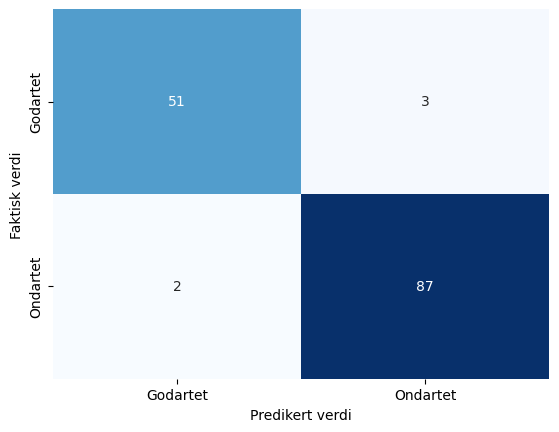

In [11]:
sns.heatmap(confusion_matrix(y_test,(y_test_hat>0.5)*1), annot=True, cbar=False,cmap="Blues")
plt.ylabel("Faktisk verdi")
plt.xlabel("Predikert verdi")
plt.xticks([0.5,1.5],["Godartet", "Ondartet"])
plt.yticks([0.5,1.5],["Godartet", "Ondartet"])
plt.show()

In [13]:
import shap

In [15]:
shap.initjs()

In [49]:
explainer = shap.LinearExplainer(logreg, X_train)

In [50]:
shap_values = explainer.shap_values(X_test)

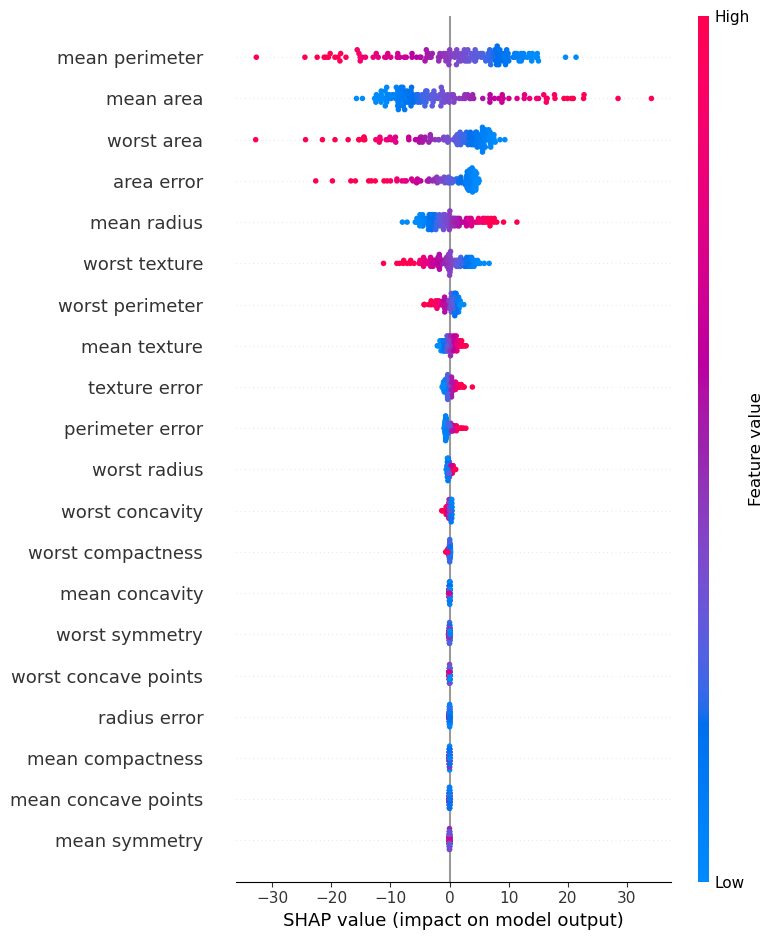

In [51]:
shap.summary_plot(shap_values, X_test)

In [62]:
explainer.expected_value

-0.8471996526921615

In [72]:
y_test = y_test.reset_index(drop=True)

Ground Truth:  1


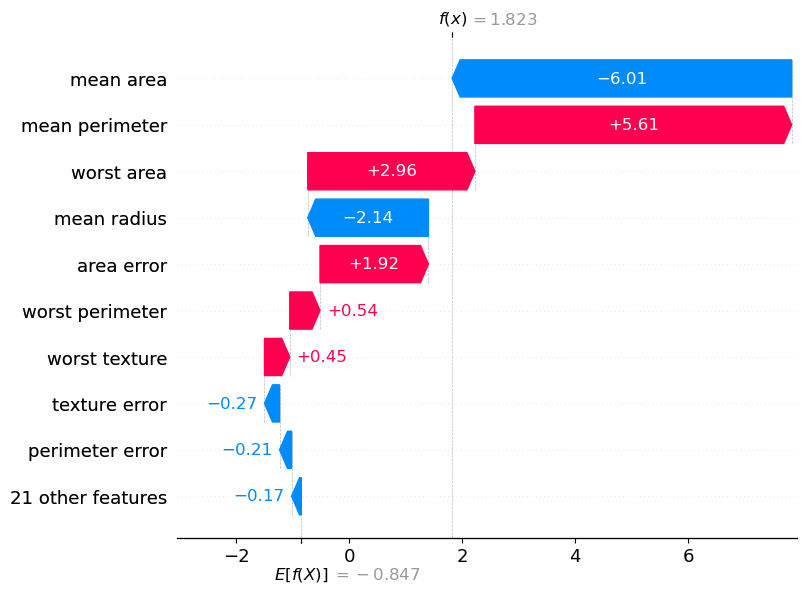

Ground Truth:  0


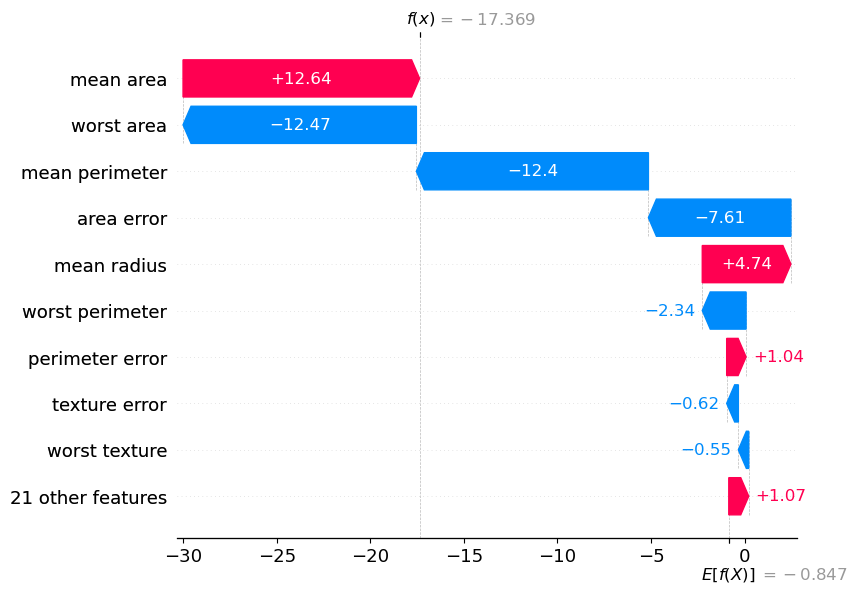

Ground Truth:  0


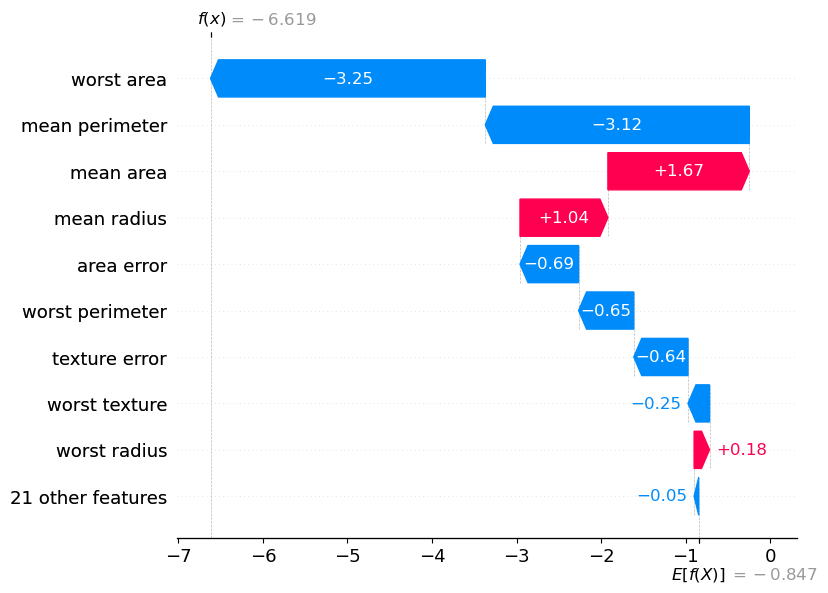

In [73]:
for i in range(3):
    print("Ground Truth: ", y_test[i])
    shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[i], feature_names=X_test.columns)
    plt.show()